# Estrategias Evolutivas: Regresión Lineal en 2 dimensiones #

## Regresión lineal en 2 dimensiones ##

Dados $N$ puntos en $\mathbb{R}^2$, la idea es encontrar la línea que mejor represente la relación entre esos datos. 

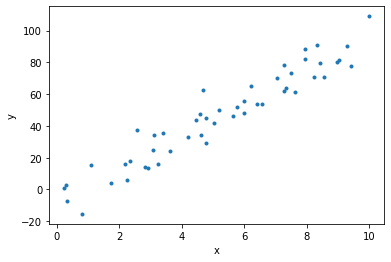

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
n = 50
X = np.random.uniform(0,10,(n))
Y = 10*X - 5 + np.random.normal(0,8,(n))
plt.figure()
plt.plot(X,Y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Recordando, la ecuación de la línea recta esta dada por $y=mx+b$. 

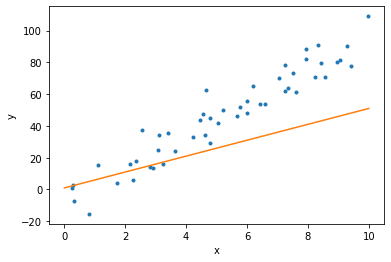

In [2]:
m = 5
b = 1
plt.figure()
plt.plot(X,Y,'.')
plt.plot([0,10],[0*m+b,10*m+b])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

El objetivo de este notebook es utilizar el algoritmo de Estrategias Evolutivas para encontrar la línea, los valores de $m$ y $b$, que mejor se ajustan a los puntos.

## Estrategias evolutivas para resolver el problema de regresión lineal en 2 dimensiones ##

### Representación de los individuos ###

Los individuos se representan utilizando la solución y el tamaño de paso de mutación $<\vec{x_i},\sigma_i>$.

En este caso, una solución está formada por los valores de los parámetros de la recta $m$ y $b$, más el tamaño de paso de mutación $\sigma$. Utilizaremos la evolución con un tamaño de paso. Por lo que el individuo $i$ se representa con un vector de la siguiente manera $<m_i,b_i,\sigma_i>$.

In [4]:
def poblacion_inicial(n):
    m = np.random.uniform(-100,100,(n,1))
    b = np.random.uniform(-100,100,(n,1))
    s = np.random.uniform(1,10,(n,1))
    return np.concatenate((m,b,s),axis=1)
poblacion = poblacion_inicial(20)
print(poblacion[0])

[-61.61677681  58.99820181   9.98504713]


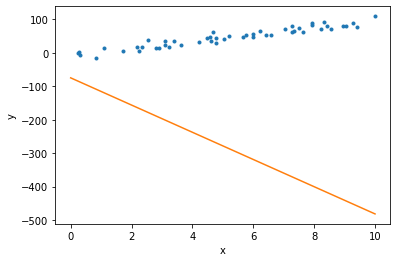

In [7]:
def graficar_solucion_individuo(ind):
    m,b = ind[0],ind[1]
    plt.figure()
    plt.plot(X,Y,'.')
    plt.plot([0,10],[0*m+b,10*m+b])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
graficar_solucion_individuo(poblacion[2])

### Aptitud del individuo

La aptitud del individuo $i$ debe medir la "distancia" entre la línea y los puntos. Para esto, por cada punto $<x_k,y_k>$, se debe calcular el valor $\hat{y_k}$ que corresponde al valor en la línea correspondiente a $x_k$, es decir, $\hat{y_k} = x_k*m_i + b_i$. Finalmente se debe calcular el promedio entre las diferencias cuadradas de $y_k$ y $\hat{y_k}$. Entre más pequeño sea el valor, o el error, mejor adaptado estará el individuo al problema. 

In [8]:
def aptitud_individuo(ind):
    m,b = ind[0],ind[1]
    Yc = X*m+b
    return np.mean((Y-Yc)**2)
print(aptitud_individuo(poblacion[0]))

133202.2260698657


157420.44882301128


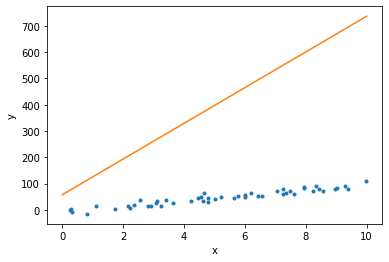

In [12]:
def aptitud_poblacion(poblacion):
    return [aptitud_individuo(poblacion[i]) for i in range(len(poblacion))]
aptitud = aptitud_poblacion(poblacion)
i = 1
print(aptitud[i])
graficar_solucion_individuo(poblacion[i])
    

### Mutación

La mutación se realiza de la siguiente manera:

$\sigma_i^{'} = \sigma_i * e^{\mathcal{N}(0,\tau)}$

$x_{ij}^{'} = x_{ij} + \mathcal{N}(0,\sigma_i)$

donde $\tau = 1/\sqrt{n}$. Además, para evitar que el tamaño de paso de mutación sea igual a 0, es conveniente realizar la siguiente validación, si $\sigma_i^{'} < \epsilon$ entonces $\sigma_i^{'} = \epsilon $, donde $\epsilon$ es un número escalar muy pequeño, se recomienda $\epsilon = 1e-3$

In [ ]:
def mutacion_poblacion(poblacion):
    # código
    return poblacion_nueva


### Reproducción

Intermedia: El hijo es calculado como el promedio de los padres

Discreta: Cada elemento del hijo se selecciona de forma aleatoria de alguno de los dos padres

In [ ]:
def reproduccion_poblacion(poblacion,lambd,metodo='intermedia'):
    if metodo == 'intermedia':
        # código
    else:
        # código
    return hijos       

### Selección de sobrevivientes

$(\mu,\lambda)$: Se generan $\lambda$ hijos, pero sólo los mejores $\mu$ hijos forman parte de la siguiente generación.

$(\mu+\lambda)$: Se generan $\lambda$ hijos, pero sólo los mejores $\mu$ individuos, conjunto de individuos formado por padres e hijos, forman parte de la siguiente generación.

In [ ]:
def seleccion_sobrevivientes(mu,hijos,apthijos,padres=None,aptpadres=None,metodo='mu,lambda'):
    if metodo == 'mu,lambda':
        # código
    else:
        # código
    return poblacion_nueva, apt_poblacion_nueva

### Algoritmo

In [ ]:
n = 20
u = 20
lambd = 40
G = 10
poblacion = poblacion_inicial(n)
aptitud = aptitud_poblacion(poblacion)

idxelite = np.argmin(aptitud)
aptelite = aptitud[idxelite]
elite = poblacion[idxelite]

g = 0
print('g:',g,aptelite)
print('elite:',elite)
graficar_solucion_individuo(elite)
while g<G:
    poblacion = mutacion_poblacion(poblacion)
    # Estrategias: 'discreta' o 'intermedia'
    hijos = reproduccion_poblacion(poblacion,lambd,metodo='intermedia') 
    aptitud = aptitud_poblacion(poblacion)
    apthijos = aptitud_poblacion(hijos)
    # Estrategias: 'mu,lambda' mu+lambda'
    poblacion,aptitud = seleccion_sobrevivientes(n,hijos,apthijos,poblacion,aptitud,metodo='mu+lambda') 
    if aptitud[0]<aptelite:
        aptelite = aptitud[0]
        elite = poblacion[0]
    else:
        poblacion[-1] = elite
        aptitud[-1] = aptelite
    g+=1
    print('g:',g,'aptitud:',aptelite)
    print('elite:',elite)
    graficar_solucion_individuo(elite)
    